In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import PIL #importing pillow for image processing
from PIL import Image#importing image from pillow library
import skimage#importing skimage library
import os#importing os library
import time#importing time library

#Capture start time of the program
start_time = time.time()

In [2]:
#changing path
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//32//32_no_bias_vector//')

# KNN on rgb data

In [3]:
#reading numpy array data
rgb_test = np.load('rgb_data.npy')
#reading csv file
rgb_df = pd.read_csv('rgb_data.csv')

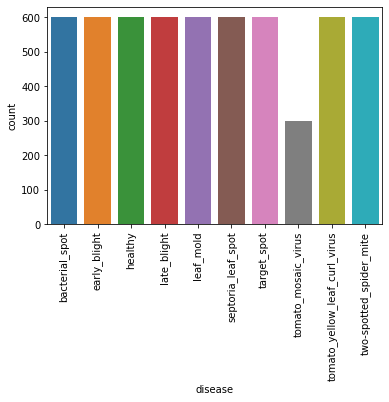

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = rgb_df,x='disease')
plt.xticks(rotation = 90)
plt.show()

In [5]:
print(rgb_df.shape)

(5699, 2)


In [6]:
loaded = []
for i in rgb_test:
    k = []
    k = np.asarray(i,dtype='uint8')
    loaded.append(k)

In [7]:
#assigning features and target
features = loaded
target = rgb_df['disease']
#splitting the data to 80 percent and 20 percent
from sklearn.model_selection import train_test_split
Ftrain,Ftest,Ltrain,Ltest=train_test_split(features,target, test_size=0.20, random_state=24)

In [8]:
#K-Model on the data
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=75)

In [9]:
#k-model fitting and accuracy
kmodel.fit(Ftrain,Ltrain)
print(kmodel.score(Ftest,Ltest))

0.4456140350877193


In [10]:
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
#printing results of the kmodel
y_predict = kmodel.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.28      0.76      0.41       115
                 early_blight       1.00      0.02      0.03       120
                      healthy       0.37      0.84      0.51       125
                  late_blight       0.41      0.24      0.30       125
                    leaf_mold       0.70      0.58      0.64       127
           septoria_leaf_spot       0.69      0.30      0.42       117
                  target_spot       0.58      0.31      0.41       115
          tomato_mosaic_virus       0.45      0.52      0.48        54
tomato_yellow_leaf_curl_virus       0.86      0.37      0.52       114
      two-spotted_spider_mite       0.49      0.54      0.51       128

                     accuracy                           0.45      1140
                    macro avg       0.58      0.45      0.42      1140
                 weighted avg       0.59      0.45      0.42      1140

[[ 

# Logistic on rgb data

In [12]:
#importing logistic data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(Ftrain,Ltrain)
print(model.score(Ftest,Ltest))

0.5622807017543859


In [13]:
#classification report
y_predict = model.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.62      0.54       115
                 early_blight       0.41      0.38      0.40       120
                      healthy       0.60      0.54      0.57       125
                  late_blight       0.50      0.56      0.53       125
                    leaf_mold       0.63      0.63      0.63       127
           septoria_leaf_spot       0.43      0.38      0.40       117
                  target_spot       0.56      0.55      0.55       115
          tomato_mosaic_virus       0.67      0.76      0.71        54
tomato_yellow_leaf_curl_virus       0.81      0.75      0.78       114
      two-spotted_spider_mite       0.62      0.57      0.59       128

                     accuracy                           0.56      1140
                    macro avg       0.57      0.57      0.57      1140
                 weighted avg       0.56      0.56      0.56      1140

[[7

# SVM on RGB data

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(Ftrain,Ltrain)
y_pred = clf.predict(Ftest)
print(accuracy_score(Ltest,y_pred))

0.6929824561403509


In [15]:
#classification report
y_predict = clf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.66      0.83      0.73       115
                 early_blight       0.51      0.47      0.49       120
                      healthy       0.82      0.78      0.80       125
                  late_blight       0.61      0.66      0.64       125
                    leaf_mold       0.74      0.75      0.75       127
           septoria_leaf_spot       0.67      0.60      0.63       117
                  target_spot       0.69      0.67      0.68       115
          tomato_mosaic_virus       0.76      0.89      0.82        54
tomato_yellow_leaf_curl_virus       0.82      0.80      0.81       114
      two-spotted_spider_mite       0.68      0.60      0.64       128

                     accuracy                           0.69      1140
                    macro avg       0.70      0.70      0.70      1140
                 weighted avg       0.69      0.69      0.69      1140

[[9

# Random Forest on RGB 

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [18]:
classifier_rf.fit(Ftrain, Ltrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [19]:
classifier_rf.oob_score_

0.5384952840535205

In [20]:
y_predict = classifier_rf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.64      0.55       115
                 early_blight       0.61      0.09      0.16       120
                      healthy       0.61      0.91      0.73       125
                  late_blight       0.65      0.34      0.44       125
                    leaf_mold       0.61      0.68      0.64       127
           septoria_leaf_spot       0.50      0.43      0.46       117
                  target_spot       0.49      0.76      0.60       115
          tomato_mosaic_virus       0.50      0.02      0.04        54
tomato_yellow_leaf_curl_virus       0.54      0.83      0.65       114
      two-spotted_spider_mite       0.48      0.45      0.46       128

                     accuracy                           0.54      1140
                    macro avg       0.55      0.51      0.47      1140
                 weighted avg       0.55      0.54      0.50      1140

[[ 

# Naive Bayes on RGB data

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Ftrain, Ltrain)

GaussianNB()

In [22]:
y_pred = gnb.predict(Ftest)

In [23]:
from sklearn import metrics
metrics.accuracy_score(Ltest, y_pred)

0.45614035087719296

In [24]:
class_names = target.unique()
print(classification_report(Ltest, y_pred, target_names=class_names))
print(confusion_matrix(Ltest, y_pred))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.70      0.57       115
                 early_blight       0.38      0.28      0.32       120
                      healthy       0.46      0.68      0.55       125
                  late_blight       0.37      0.22      0.27       125
                    leaf_mold       0.76      0.42      0.54       127
           septoria_leaf_spot       0.36      0.40      0.38       117
                  target_spot       0.51      0.43      0.46       115
          tomato_mosaic_virus       0.31      0.72      0.44        54
tomato_yellow_leaf_curl_virus       0.65      0.46      0.54       114
      two-spotted_spider_mite       0.42      0.43      0.43       128

                     accuracy                           0.46      1140
                    macro avg       0.47      0.47      0.45      1140
                 weighted avg       0.48      0.46      0.45      1140

[[8

# Decision Tree on RGB data

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()

In [26]:
classifier_tree.fit(Ftrain, Ltrain)
classifier_tree.score(Ftest,Ltest)

0.437719298245614

In [27]:
y_predict = classifier_tree.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.46      0.51      0.49       115
                 early_blight       0.28      0.26      0.27       120
                      healthy       0.65      0.67      0.66       125
                  late_blight       0.39      0.41      0.40       125
                    leaf_mold       0.53      0.48      0.50       127
           septoria_leaf_spot       0.46      0.49      0.47       117
                  target_spot       0.39      0.37      0.38       115
          tomato_mosaic_virus       0.22      0.24      0.23        54
tomato_yellow_leaf_curl_virus       0.58      0.45      0.50       114
      two-spotted_spider_mite       0.33      0.37      0.35       128

                     accuracy                           0.44      1140
                    macro avg       0.43      0.42      0.43      1140
                 weighted avg       0.44      0.44      0.44      1140

[[5

# KNN on grayscale data

In [28]:
#reading numpy array data
gray_test = np.load('gray_test.npy')
#reading csv file
gray_df = pd.read_csv('gray_data.csv')

In [29]:
loaded = []
for i in gray_test:
    k = []
    k = np.asarray(i,dtype='uint8')
    loaded.append(k)

In [30]:
features = loaded
target = gray_df['disease']

In [31]:
kmodel.fit(Ftrain,Ltrain)
kmodel.score(Ftest,Ltest)

0.4456140350877193

In [32]:
y_predict = kmodel.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.28      0.76      0.41       115
                 early_blight       1.00      0.02      0.03       120
                      healthy       0.37      0.84      0.51       125
                  late_blight       0.41      0.24      0.30       125
                    leaf_mold       0.70      0.58      0.64       127
           septoria_leaf_spot       0.69      0.30      0.42       117
                  target_spot       0.58      0.31      0.41       115
          tomato_mosaic_virus       0.45      0.52      0.48        54
tomato_yellow_leaf_curl_virus       0.86      0.37      0.52       114
      two-spotted_spider_mite       0.49      0.54      0.51       128

                     accuracy                           0.45      1140
                    macro avg       0.58      0.45      0.42      1140
                 weighted avg       0.59      0.45      0.42      1140

[[ 

# Logistic on grayscale data

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(Ftrain,Ltrain)
model.score(Ftest,Ltest)

0.5622807017543859

In [34]:
y_predict = model.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.62      0.54       115
                 early_blight       0.41      0.38      0.40       120
                      healthy       0.60      0.54      0.57       125
                  late_blight       0.50      0.56      0.53       125
                    leaf_mold       0.63      0.63      0.63       127
           septoria_leaf_spot       0.43      0.38      0.40       117
                  target_spot       0.56      0.55      0.55       115
          tomato_mosaic_virus       0.67      0.76      0.71        54
tomato_yellow_leaf_curl_virus       0.81      0.75      0.78       114
      two-spotted_spider_mite       0.62      0.57      0.59       128

                     accuracy                           0.56      1140
                    macro avg       0.57      0.57      0.57      1140
                 weighted avg       0.56      0.56      0.56      1140

[[7

# SVM on Grayscale data

In [35]:
clf = SVC(kernel='linear')
clf.fit(Ftrain,Ltrain)
y_pred = clf.predict(Ftest)
print(accuracy_score(Ltest,y_pred))

0.6929824561403509


In [36]:
y_predict = clf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.66      0.83      0.73       115
                 early_blight       0.51      0.47      0.49       120
                      healthy       0.82      0.78      0.80       125
                  late_blight       0.61      0.66      0.64       125
                    leaf_mold       0.74      0.75      0.75       127
           septoria_leaf_spot       0.67      0.60      0.63       117
                  target_spot       0.69      0.67      0.68       115
          tomato_mosaic_virus       0.76      0.89      0.82        54
tomato_yellow_leaf_curl_virus       0.82      0.80      0.81       114
      two-spotted_spider_mite       0.68      0.60      0.64       128

                     accuracy                           0.69      1140
                    macro avg       0.70      0.70      0.70      1140
                 weighted avg       0.69      0.69      0.69      1140

[[9

# Random Forest on Grayscale

In [37]:
classifier_rf.fit(Ftrain, Ltrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [38]:
classifier_rf.oob_score_

0.5384952840535205

In [39]:
y_predict = classifier_rf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.64      0.55       115
                 early_blight       0.61      0.09      0.16       120
                      healthy       0.61      0.91      0.73       125
                  late_blight       0.65      0.34      0.44       125
                    leaf_mold       0.61      0.68      0.64       127
           septoria_leaf_spot       0.50      0.43      0.46       117
                  target_spot       0.49      0.76      0.60       115
          tomato_mosaic_virus       0.50      0.02      0.04        54
tomato_yellow_leaf_curl_virus       0.54      0.83      0.65       114
      two-spotted_spider_mite       0.48      0.45      0.46       128

                     accuracy                           0.54      1140
                    macro avg       0.55      0.51      0.47      1140
                 weighted avg       0.55      0.54      0.50      1140

[[ 

# Naive bayes on Grayscale

In [40]:
gnb.fit(Ftrain, Ltrain)

GaussianNB()

In [41]:
y_pred = gnb.predict(Ftest)
metrics.accuracy_score(Ltest, y_pred)

0.45614035087719296

In [42]:
class_names = target.unique()
print(classification_report(Ltest, y_pred, target_names=class_names))
print(confusion_matrix(Ltest, y_pred))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.70      0.57       115
                 early_blight       0.38      0.28      0.32       120
                      healthy       0.46      0.68      0.55       125
                  late_blight       0.37      0.22      0.27       125
                    leaf_mold       0.76      0.42      0.54       127
           septoria_leaf_spot       0.36      0.40      0.38       117
                  target_spot       0.51      0.43      0.46       115
          tomato_mosaic_virus       0.31      0.72      0.44        54
tomato_yellow_leaf_curl_virus       0.65      0.46      0.54       114
      two-spotted_spider_mite       0.42      0.43      0.43       128

                     accuracy                           0.46      1140
                    macro avg       0.47      0.47      0.45      1140
                 weighted avg       0.48      0.46      0.45      1140

[[8

# Decision Tree on Grayscale

In [43]:
classifier_tree.fit(Ftrain, Ltrain)
classifier_tree.score(Ftest,Ltest)

0.437719298245614

In [44]:
y_predict = classifier_tree.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.44      0.50      0.46       115
                 early_blight       0.24      0.24      0.24       120
                      healthy       0.63      0.68      0.65       125
                  late_blight       0.44      0.40      0.42       125
                    leaf_mold       0.56      0.48      0.52       127
           septoria_leaf_spot       0.45      0.46      0.45       117
                  target_spot       0.39      0.43      0.41       115
          tomato_mosaic_virus       0.27      0.31      0.29        54
tomato_yellow_leaf_curl_virus       0.56      0.46      0.50       114
      two-spotted_spider_mite       0.36      0.37      0.37       128

                     accuracy                           0.44      1140
                    macro avg       0.43      0.43      0.43      1140
                 weighted avg       0.44      0.44      0.44      1140

[[5

# KNN on Red channel data

In [45]:
#reading numpy array data
red_test = np.load('red_data.npy')
#reading csv file
red_df = pd.read_csv('red_data.csv')

In [46]:
loaded = []
for i in red_test:
    k = []
    k = np.asarray(i,dtype='uint8')
    loaded.append(k)
features = loaded
target = red_df['disease']

In [47]:
kmodel.fit(Ftrain,Ltrain)
kmodel.score(Ftest,Ltest)

0.4456140350877193

In [48]:
y_predict = kmodel.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.28      0.76      0.41       115
                 early_blight       1.00      0.02      0.03       120
                      healthy       0.37      0.84      0.51       125
                  late_blight       0.41      0.24      0.30       125
                    leaf_mold       0.70      0.58      0.64       127
           septoria_leaf_spot       0.69      0.30      0.42       117
                  target_spot       0.58      0.31      0.41       115
          tomato_mosaic_virus       0.45      0.52      0.48        54
tomato_yellow_leaf_curl_virus       0.86      0.37      0.52       114
      two-spotted_spider_mite       0.49      0.54      0.51       128

                     accuracy                           0.45      1140
                    macro avg       0.58      0.45      0.42      1140
                 weighted avg       0.59      0.45      0.42      1140

[[ 

# Logistic on Red channel data

In [49]:
model.fit(Ftrain,Ltrain)
model.score(Ftest,Ltest)

0.5622807017543859

In [50]:
y_predict = model.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.62      0.54       115
                 early_blight       0.41      0.38      0.40       120
                      healthy       0.60      0.54      0.57       125
                  late_blight       0.50      0.56      0.53       125
                    leaf_mold       0.63      0.63      0.63       127
           septoria_leaf_spot       0.43      0.38      0.40       117
                  target_spot       0.56      0.55      0.55       115
          tomato_mosaic_virus       0.67      0.76      0.71        54
tomato_yellow_leaf_curl_virus       0.81      0.75      0.78       114
      two-spotted_spider_mite       0.62      0.57      0.59       128

                     accuracy                           0.56      1140
                    macro avg       0.57      0.57      0.57      1140
                 weighted avg       0.56      0.56      0.56      1140

[[7

# SVM on Red channel data

In [51]:
clf.fit(Ftrain,Ltrain)
y_pred = clf.predict(Ftest)
print(accuracy_score(Ltest,y_pred))

0.6929824561403509


In [52]:
y_predict = clf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.66      0.83      0.73       115
                 early_blight       0.51      0.47      0.49       120
                      healthy       0.82      0.78      0.80       125
                  late_blight       0.61      0.66      0.64       125
                    leaf_mold       0.74      0.75      0.75       127
           septoria_leaf_spot       0.67      0.60      0.63       117
                  target_spot       0.69      0.67      0.68       115
          tomato_mosaic_virus       0.76      0.89      0.82        54
tomato_yellow_leaf_curl_virus       0.82      0.80      0.81       114
      two-spotted_spider_mite       0.68      0.60      0.64       128

                     accuracy                           0.69      1140
                    macro avg       0.70      0.70      0.70      1140
                 weighted avg       0.69      0.69      0.69      1140

[[9

# Random forest on Red channel data

In [53]:
classifier_rf.fit(Ftrain, Ltrain)
classifier_rf.oob_score_

0.5384952840535205

In [54]:
y_predict = classifier_rf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.64      0.55       115
                 early_blight       0.61      0.09      0.16       120
                      healthy       0.61      0.91      0.73       125
                  late_blight       0.65      0.34      0.44       125
                    leaf_mold       0.61      0.68      0.64       127
           septoria_leaf_spot       0.50      0.43      0.46       117
                  target_spot       0.49      0.76      0.60       115
          tomato_mosaic_virus       0.50      0.02      0.04        54
tomato_yellow_leaf_curl_virus       0.54      0.83      0.65       114
      two-spotted_spider_mite       0.48      0.45      0.46       128

                     accuracy                           0.54      1140
                    macro avg       0.55      0.51      0.47      1140
                 weighted avg       0.55      0.54      0.50      1140

[[ 

# Naive Bayes on Red channel data

In [55]:
gnb.fit(Ftrain, Ltrain)

GaussianNB()

In [56]:
y_pred = gnb.predict(Ftest)
metrics.accuracy_score(Ltest, y_pred)

0.45614035087719296

In [57]:
class_names = target.unique()
print(classification_report(Ltest, y_pred, target_names=class_names))
print(confusion_matrix(Ltest, y_pred))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.70      0.57       115
                 early_blight       0.38      0.28      0.32       120
                      healthy       0.46      0.68      0.55       125
                  late_blight       0.37      0.22      0.27       125
                    leaf_mold       0.76      0.42      0.54       127
           septoria_leaf_spot       0.36      0.40      0.38       117
                  target_spot       0.51      0.43      0.46       115
          tomato_mosaic_virus       0.31      0.72      0.44        54
tomato_yellow_leaf_curl_virus       0.65      0.46      0.54       114
      two-spotted_spider_mite       0.42      0.43      0.43       128

                     accuracy                           0.46      1140
                    macro avg       0.47      0.47      0.45      1140
                 weighted avg       0.48      0.46      0.45      1140

[[8

# Decision Tree on Red channel

In [58]:
classifier_tree.fit(Ftrain, Ltrain)
classifier_tree.score(Ftest,Ltest)

0.4201754385964912

In [59]:
y_predict = classifier_tree.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.51      0.47      0.49       115
                 early_blight       0.25      0.25      0.25       120
                      healthy       0.65      0.65      0.65       125
                  late_blight       0.45      0.42      0.43       125
                    leaf_mold       0.53      0.53      0.53       127
           septoria_leaf_spot       0.42      0.42      0.42       117
                  target_spot       0.39      0.41      0.40       115
          tomato_mosaic_virus       0.18      0.26      0.21        54
tomato_yellow_leaf_curl_virus       0.50      0.46      0.47       114
      two-spotted_spider_mite       0.38      0.38      0.38       128

                     accuracy                           0.43      1140
                    macro avg       0.43      0.42      0.42      1140
                 weighted avg       0.44      0.43      0.44      1140

[[5

# KNN on green channel data

In [60]:
#reading numpy array data
green_test = np.load('green_data.npy')
#reading csv file
green_df = pd.read_csv('green_data.csv')
loaded = []
for i in green_test:
    k = []
    k = np.asarray(i,dtype='uint8')
    loaded.append(k)
features = loaded
target = green_df['disease']
kmodel.fit(Ftrain,Ltrain)
kmodel.score(Ftest,Ltest)

0.4456140350877193

In [61]:
y_predict = kmodel.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.28      0.76      0.41       115
                 early_blight       1.00      0.02      0.03       120
                      healthy       0.37      0.84      0.51       125
                  late_blight       0.41      0.24      0.30       125
                    leaf_mold       0.70      0.58      0.64       127
           septoria_leaf_spot       0.69      0.30      0.42       117
                  target_spot       0.58      0.31      0.41       115
          tomato_mosaic_virus       0.45      0.52      0.48        54
tomato_yellow_leaf_curl_virus       0.86      0.37      0.52       114
      two-spotted_spider_mite       0.49      0.54      0.51       128

                     accuracy                           0.45      1140
                    macro avg       0.58      0.45      0.42      1140
                 weighted avg       0.59      0.45      0.42      1140

[[ 

# Logistic on Green channel data

In [62]:
model.fit(Ftrain,Ltrain)
model.score(Ftest,Ltest)

0.5622807017543859

In [63]:
y_predict = model.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.62      0.54       115
                 early_blight       0.41      0.38      0.40       120
                      healthy       0.60      0.54      0.57       125
                  late_blight       0.50      0.56      0.53       125
                    leaf_mold       0.63      0.63      0.63       127
           septoria_leaf_spot       0.43      0.38      0.40       117
                  target_spot       0.56      0.55      0.55       115
          tomato_mosaic_virus       0.67      0.76      0.71        54
tomato_yellow_leaf_curl_virus       0.81      0.75      0.78       114
      two-spotted_spider_mite       0.62      0.57      0.59       128

                     accuracy                           0.56      1140
                    macro avg       0.57      0.57      0.57      1140
                 weighted avg       0.56      0.56      0.56      1140

[[7

# SVM on green channel data

In [64]:
clf.fit(Ftrain,Ltrain)
y_pred = clf.predict(Ftest)
print(accuracy_score(Ltest,y_pred))

0.6929824561403509


In [65]:
y_predict = clf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.66      0.83      0.73       115
                 early_blight       0.51      0.47      0.49       120
                      healthy       0.82      0.78      0.80       125
                  late_blight       0.61      0.66      0.64       125
                    leaf_mold       0.74      0.75      0.75       127
           septoria_leaf_spot       0.67      0.60      0.63       117
                  target_spot       0.69      0.67      0.68       115
          tomato_mosaic_virus       0.76      0.89      0.82        54
tomato_yellow_leaf_curl_virus       0.82      0.80      0.81       114
      two-spotted_spider_mite       0.68      0.60      0.64       128

                     accuracy                           0.69      1140
                    macro avg       0.70      0.70      0.70      1140
                 weighted avg       0.69      0.69      0.69      1140

[[9

# Random Forest on green channel data

In [66]:
classifier_rf.fit(Ftrain, Ltrain)
classifier_rf.oob_score_

0.5384952840535205

In [67]:
y_predict = classifier_rf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.64      0.55       115
                 early_blight       0.61      0.09      0.16       120
                      healthy       0.61      0.91      0.73       125
                  late_blight       0.65      0.34      0.44       125
                    leaf_mold       0.61      0.68      0.64       127
           septoria_leaf_spot       0.50      0.43      0.46       117
                  target_spot       0.49      0.76      0.60       115
          tomato_mosaic_virus       0.50      0.02      0.04        54
tomato_yellow_leaf_curl_virus       0.54      0.83      0.65       114
      two-spotted_spider_mite       0.48      0.45      0.46       128

                     accuracy                           0.54      1140
                    macro avg       0.55      0.51      0.47      1140
                 weighted avg       0.55      0.54      0.50      1140

[[ 

# Naive bayes on Green channel data

In [68]:
gnb.fit(Ftrain, Ltrain)
y_pred = gnb.predict(Ftest)
metrics.accuracy_score(Ltest, y_pred)

0.45614035087719296

In [69]:
class_names = target.unique()
print(classification_report(Ltest, y_pred, target_names=class_names))
print(confusion_matrix(Ltest, y_pred))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.70      0.57       115
                 early_blight       0.38      0.28      0.32       120
                      healthy       0.46      0.68      0.55       125
                  late_blight       0.37      0.22      0.27       125
                    leaf_mold       0.76      0.42      0.54       127
           septoria_leaf_spot       0.36      0.40      0.38       117
                  target_spot       0.51      0.43      0.46       115
          tomato_mosaic_virus       0.31      0.72      0.44        54
tomato_yellow_leaf_curl_virus       0.65      0.46      0.54       114
      two-spotted_spider_mite       0.42      0.43      0.43       128

                     accuracy                           0.46      1140
                    macro avg       0.47      0.47      0.45      1140
                 weighted avg       0.48      0.46      0.45      1140

[[8

# Decision Tree on Green channel

In [70]:
classifier_tree.fit(Ftrain, Ltrain)
classifier_tree.score(Ftest,Ltest)

0.44649122807017544

In [71]:
y_predict = classifier_tree.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.49      0.51      0.50       115
                 early_blight       0.25      0.24      0.25       120
                      healthy       0.62      0.68      0.65       125
                  late_blight       0.50      0.43      0.46       125
                    leaf_mold       0.54      0.52      0.53       127
           septoria_leaf_spot       0.42      0.48      0.45       117
                  target_spot       0.38      0.39      0.39       115
          tomato_mosaic_virus       0.25      0.28      0.26        54
tomato_yellow_leaf_curl_virus       0.55      0.47      0.51       114
      two-spotted_spider_mite       0.34      0.34      0.34       128

                     accuracy                           0.44      1140
                    macro avg       0.43      0.43      0.43      1140
                 weighted avg       0.44      0.44      0.44      1140

[[5

# KNN on blue channel data

In [72]:
#reading numpy array data
blue_test = np.load('blue_data.npy')
#reading csv file
blue_df = pd.read_csv('blue_data.csv')
loaded = []
for i in gray_test:
    k = []
    k = np.asarray(i,dtype='uint8')
    loaded.append(k)
features = loaded
target = blue_df['disease']
kmodel.fit(Ftrain,Ltrain)
kmodel.score(Ftest,Ltest)

0.4456140350877193

In [73]:
y_predict = kmodel.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.28      0.76      0.41       115
                 early_blight       1.00      0.02      0.03       120
                      healthy       0.37      0.84      0.51       125
                  late_blight       0.41      0.24      0.30       125
                    leaf_mold       0.70      0.58      0.64       127
           septoria_leaf_spot       0.69      0.30      0.42       117
                  target_spot       0.58      0.31      0.41       115
          tomato_mosaic_virus       0.45      0.52      0.48        54
tomato_yellow_leaf_curl_virus       0.86      0.37      0.52       114
      two-spotted_spider_mite       0.49      0.54      0.51       128

                     accuracy                           0.45      1140
                    macro avg       0.58      0.45      0.42      1140
                 weighted avg       0.59      0.45      0.42      1140

[[ 

# logistic on blue channel data

In [74]:
model.fit(Ftrain,Ltrain)
model.score(Ftest,Ltest)

0.5622807017543859

In [75]:
y_predict = model.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.62      0.54       115
                 early_blight       0.41      0.38      0.40       120
                      healthy       0.60      0.54      0.57       125
                  late_blight       0.50      0.56      0.53       125
                    leaf_mold       0.63      0.63      0.63       127
           septoria_leaf_spot       0.43      0.38      0.40       117
                  target_spot       0.56      0.55      0.55       115
          tomato_mosaic_virus       0.67      0.76      0.71        54
tomato_yellow_leaf_curl_virus       0.81      0.75      0.78       114
      two-spotted_spider_mite       0.62      0.57      0.59       128

                     accuracy                           0.56      1140
                    macro avg       0.57      0.57      0.57      1140
                 weighted avg       0.56      0.56      0.56      1140

[[7

# SVM on blue channel data

In [76]:
clf.fit(Ftrain,Ltrain)
y_pred = clf.predict(Ftest)
print(accuracy_score(Ltest,y_pred))

0.6929824561403509


In [77]:
y_predict = clf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.66      0.83      0.73       115
                 early_blight       0.51      0.47      0.49       120
                      healthy       0.82      0.78      0.80       125
                  late_blight       0.61      0.66      0.64       125
                    leaf_mold       0.74      0.75      0.75       127
           septoria_leaf_spot       0.67      0.60      0.63       117
                  target_spot       0.69      0.67      0.68       115
          tomato_mosaic_virus       0.76      0.89      0.82        54
tomato_yellow_leaf_curl_virus       0.82      0.80      0.81       114
      two-spotted_spider_mite       0.68      0.60      0.64       128

                     accuracy                           0.69      1140
                    macro avg       0.70      0.70      0.70      1140
                 weighted avg       0.69      0.69      0.69      1140

[[9

# Random Forest on blue channel data

In [78]:
classifier_rf.fit(Ftrain, Ltrain)
classifier_rf.oob_score_

0.5384952840535205

In [79]:
y_predict = classifier_rf.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.64      0.55       115
                 early_blight       0.61      0.09      0.16       120
                      healthy       0.61      0.91      0.73       125
                  late_blight       0.65      0.34      0.44       125
                    leaf_mold       0.61      0.68      0.64       127
           septoria_leaf_spot       0.50      0.43      0.46       117
                  target_spot       0.49      0.76      0.60       115
          tomato_mosaic_virus       0.50      0.02      0.04        54
tomato_yellow_leaf_curl_virus       0.54      0.83      0.65       114
      two-spotted_spider_mite       0.48      0.45      0.46       128

                     accuracy                           0.54      1140
                    macro avg       0.55      0.51      0.47      1140
                 weighted avg       0.55      0.54      0.50      1140

[[ 

# Naive bayes on blue channel data

In [80]:
gnb.fit(Ftrain, Ltrain)
y_pred = gnb.predict(Ftest)
metrics.accuracy_score(Ltest, y_pred)

0.45614035087719296

In [81]:
class_names = target.unique()
print(classification_report(Ltest, y_pred, target_names=class_names))
print(confusion_matrix(Ltest, y_pred))

                               precision    recall  f1-score   support

               bacterial_spot       0.48      0.70      0.57       115
                 early_blight       0.38      0.28      0.32       120
                      healthy       0.46      0.68      0.55       125
                  late_blight       0.37      0.22      0.27       125
                    leaf_mold       0.76      0.42      0.54       127
           septoria_leaf_spot       0.36      0.40      0.38       117
                  target_spot       0.51      0.43      0.46       115
          tomato_mosaic_virus       0.31      0.72      0.44        54
tomato_yellow_leaf_curl_virus       0.65      0.46      0.54       114
      two-spotted_spider_mite       0.42      0.43      0.43       128

                     accuracy                           0.46      1140
                    macro avg       0.47      0.47      0.45      1140
                 weighted avg       0.48      0.46      0.45      1140

[[8

# Decision Tree on Blue channel

In [82]:
classifier_tree.fit(Ftrain, Ltrain)
classifier_tree.score(Ftest,Ltest)

0.4298245614035088

In [84]:
y_predict = classifier_tree.fit(Ftrain, Ltrain).predict(Ftest)
class_names = target.unique()
print(classification_report(Ltest, y_predict, target_names=class_names))
print(confusion_matrix(Ltest, y_predict))

                               precision    recall  f1-score   support

               bacterial_spot       0.47      0.50      0.49       115
                 early_blight       0.27      0.28      0.27       120
                      healthy       0.63      0.67      0.65       125
                  late_blight       0.45      0.44      0.44       125
                    leaf_mold       0.50      0.46      0.48       127
           septoria_leaf_spot       0.41      0.42      0.41       117
                  target_spot       0.42      0.43      0.42       115
          tomato_mosaic_virus       0.18      0.26      0.21        54
tomato_yellow_leaf_curl_virus       0.57      0.44      0.50       114
      two-spotted_spider_mite       0.38      0.36      0.37       128

                     accuracy                           0.44      1140
                    macro avg       0.43      0.42      0.42      1140
                 weighted avg       0.44      0.44      0.44      1140

[[5